In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score

# Load the dataset

In [178]:
dfpd = pd.read_csv("parkinsons.data")
dfpd.sample(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
46,phon_R01_S10_5,245.510,262.090,231.848,0.00235,0.00001,0.00127,0.00148,0.00380,0.01608,...,0.02719,0.00476,24.602,0,0.467489,0.631653,-7.156076,0.127642,2.392122,0.097336
148,phon_R01_S35_3,188.620,216.302,165.982,0.01719,0.00009,0.00996,0.01027,0.02987,0.07118,...,0.10422,0.08069,12.298,1,0.552870,0.764036,-3.377325,0.335357,3.274865,0.418646
120,phon_R01_S27_6,128.940,479.697,88.251,0.00581,0.00005,0.00241,0.00314,0.00723,0.02008,...,0.02548,0.02350,24.743,1,0.487756,0.684130,-6.186128,0.279933,2.686240,0.152428
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
171,phon_R01_S43_1,112.547,133.374,105.715,0.00355,0.00003,0.00166,0.00190,0.00499,0.01358,...,0.01992,0.00435,26.436,0,0.413295,0.756700,-6.323531,0.218885,2.193412,0.160376


# eye-ball raw data

In [179]:
print("The dataframe has %d rows" %dfpd.shape[0])
print("The dataframe has %d columns" %dfpd.shape[1])
# Columns/Feature in dataset
dfpd.info()
# No columns have null data in the file
dfpd.apply(lambda x : sum(x.isnull()))
#finding unique data
print(dfpd.apply(lambda x: len(x.unique())))
# 
dfpd.describe().transpose()

The dataframe has 195 rows
The dataframe has 24 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             19

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


# Using univariate &amp; bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations?

#### Univariate Analysis

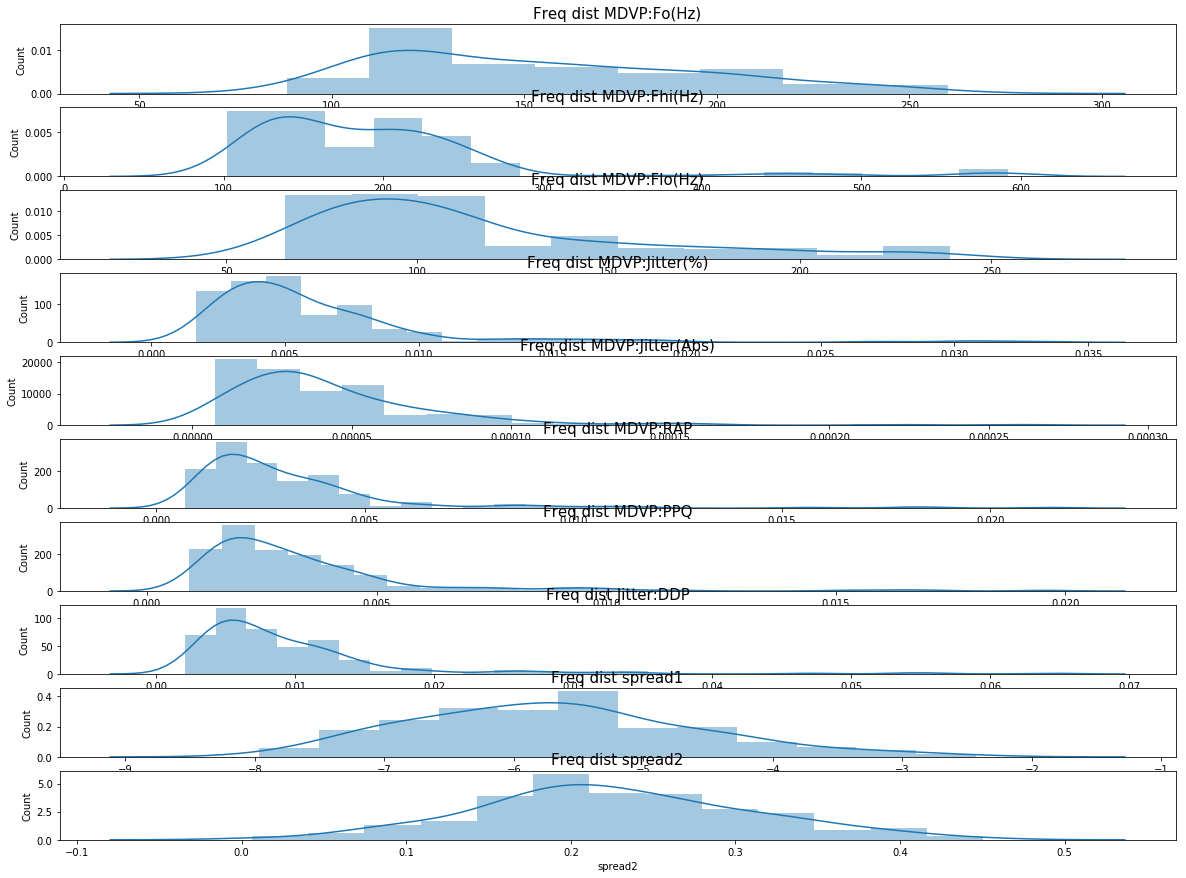

In [180]:
col_names = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP','MDVP:PPQ', 'Jitter:DDP','spread1','spread2']

fig, ax = plt.subplots(len(col_names), figsize=(20,15))

for i, col_val in enumerate(col_names):

    sns.distplot(dfpd[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=15)
    ax[i].set_xlabel(col_val, fontsize=10)
    ax[i].set_ylabel('Count', fontsize=10)

plt.show()

#### Most of the above features are positively skewed and symmentric distribution in few cases but there is a possibility of having outliers which can be revealed by using boxplots on them

#### Using BoxPlot to detect outliers

In [181]:
def detect_outlier(dfpd, col_name):
    fig, ax = plt.subplots(len(col_names), figsize=(8,40))

    for i, col_val in enumerate(col_names):

        sns.boxplot(y=dfpd[col_val], ax=ax[i])
        ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
        ax[i].set_xlabel(col_val, fontsize=8)
        
    plt.show()
   

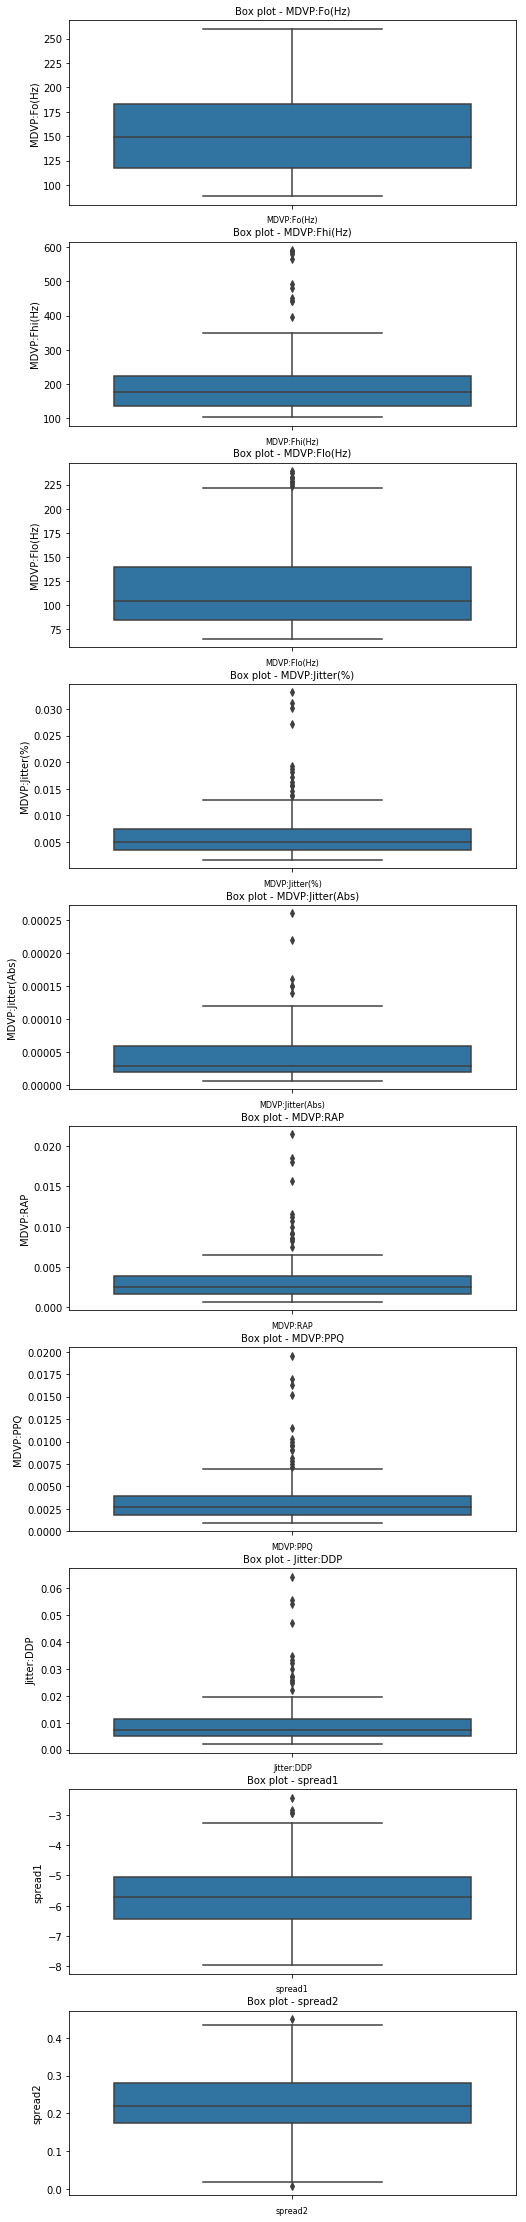

In [182]:
col_names = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP','MDVP:PPQ', 'Jitter:DDP','spread1','spread2']
detect_outlier(dfpd,col_names)

#### As per boxplots we can see there are good numbers of outliers detected for columns MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,spread1

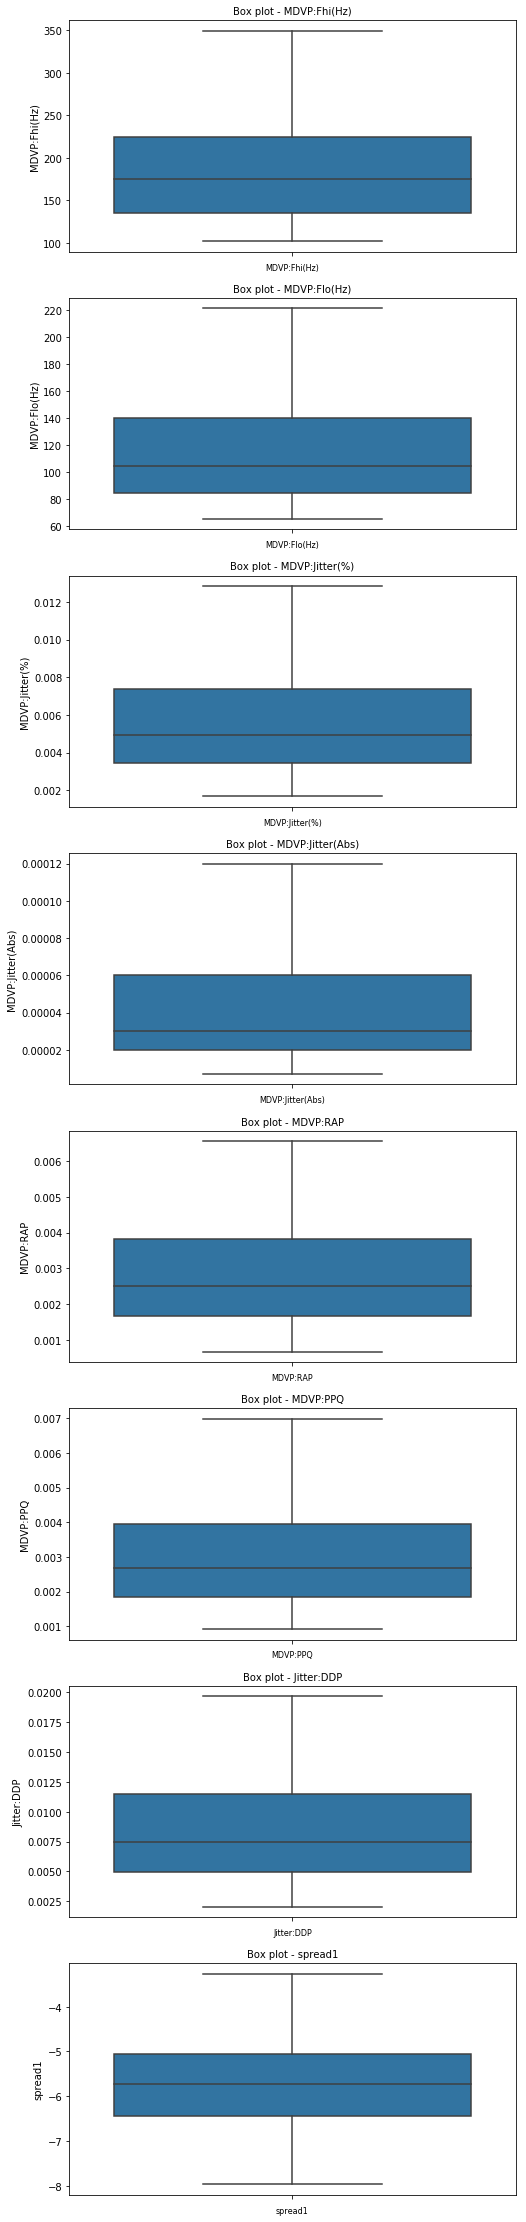

In [183]:
def remove_outlier(dfpd, col_name):
    
    for i, col_val in enumerate(col_name):
        q1 = dfpd[col_val].quantile(0.25)
        q3 = dfpd[col_val].quantile(0.75)
        iqr = q3-q1 #Interquartile range
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        # Outlier Treatment - since most of outliers false outside the upper quartile we will treate based on below condition
        max_val = dfpd[col_val].loc[dfpd[col_val]<=fence_high].max()
        dfpd[col_val] = dfpd[col_val].mask(dfpd[col_val]>fence_high,max_val)

col_names = ['MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP','MDVP:PPQ', 'Jitter:DDP','spread1']
remove_outlier(dfpd,col_names)
#No outlier detected , data is cleaned
detect_outlier(dfpd,col_names)

#### Bivariate Analysis

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


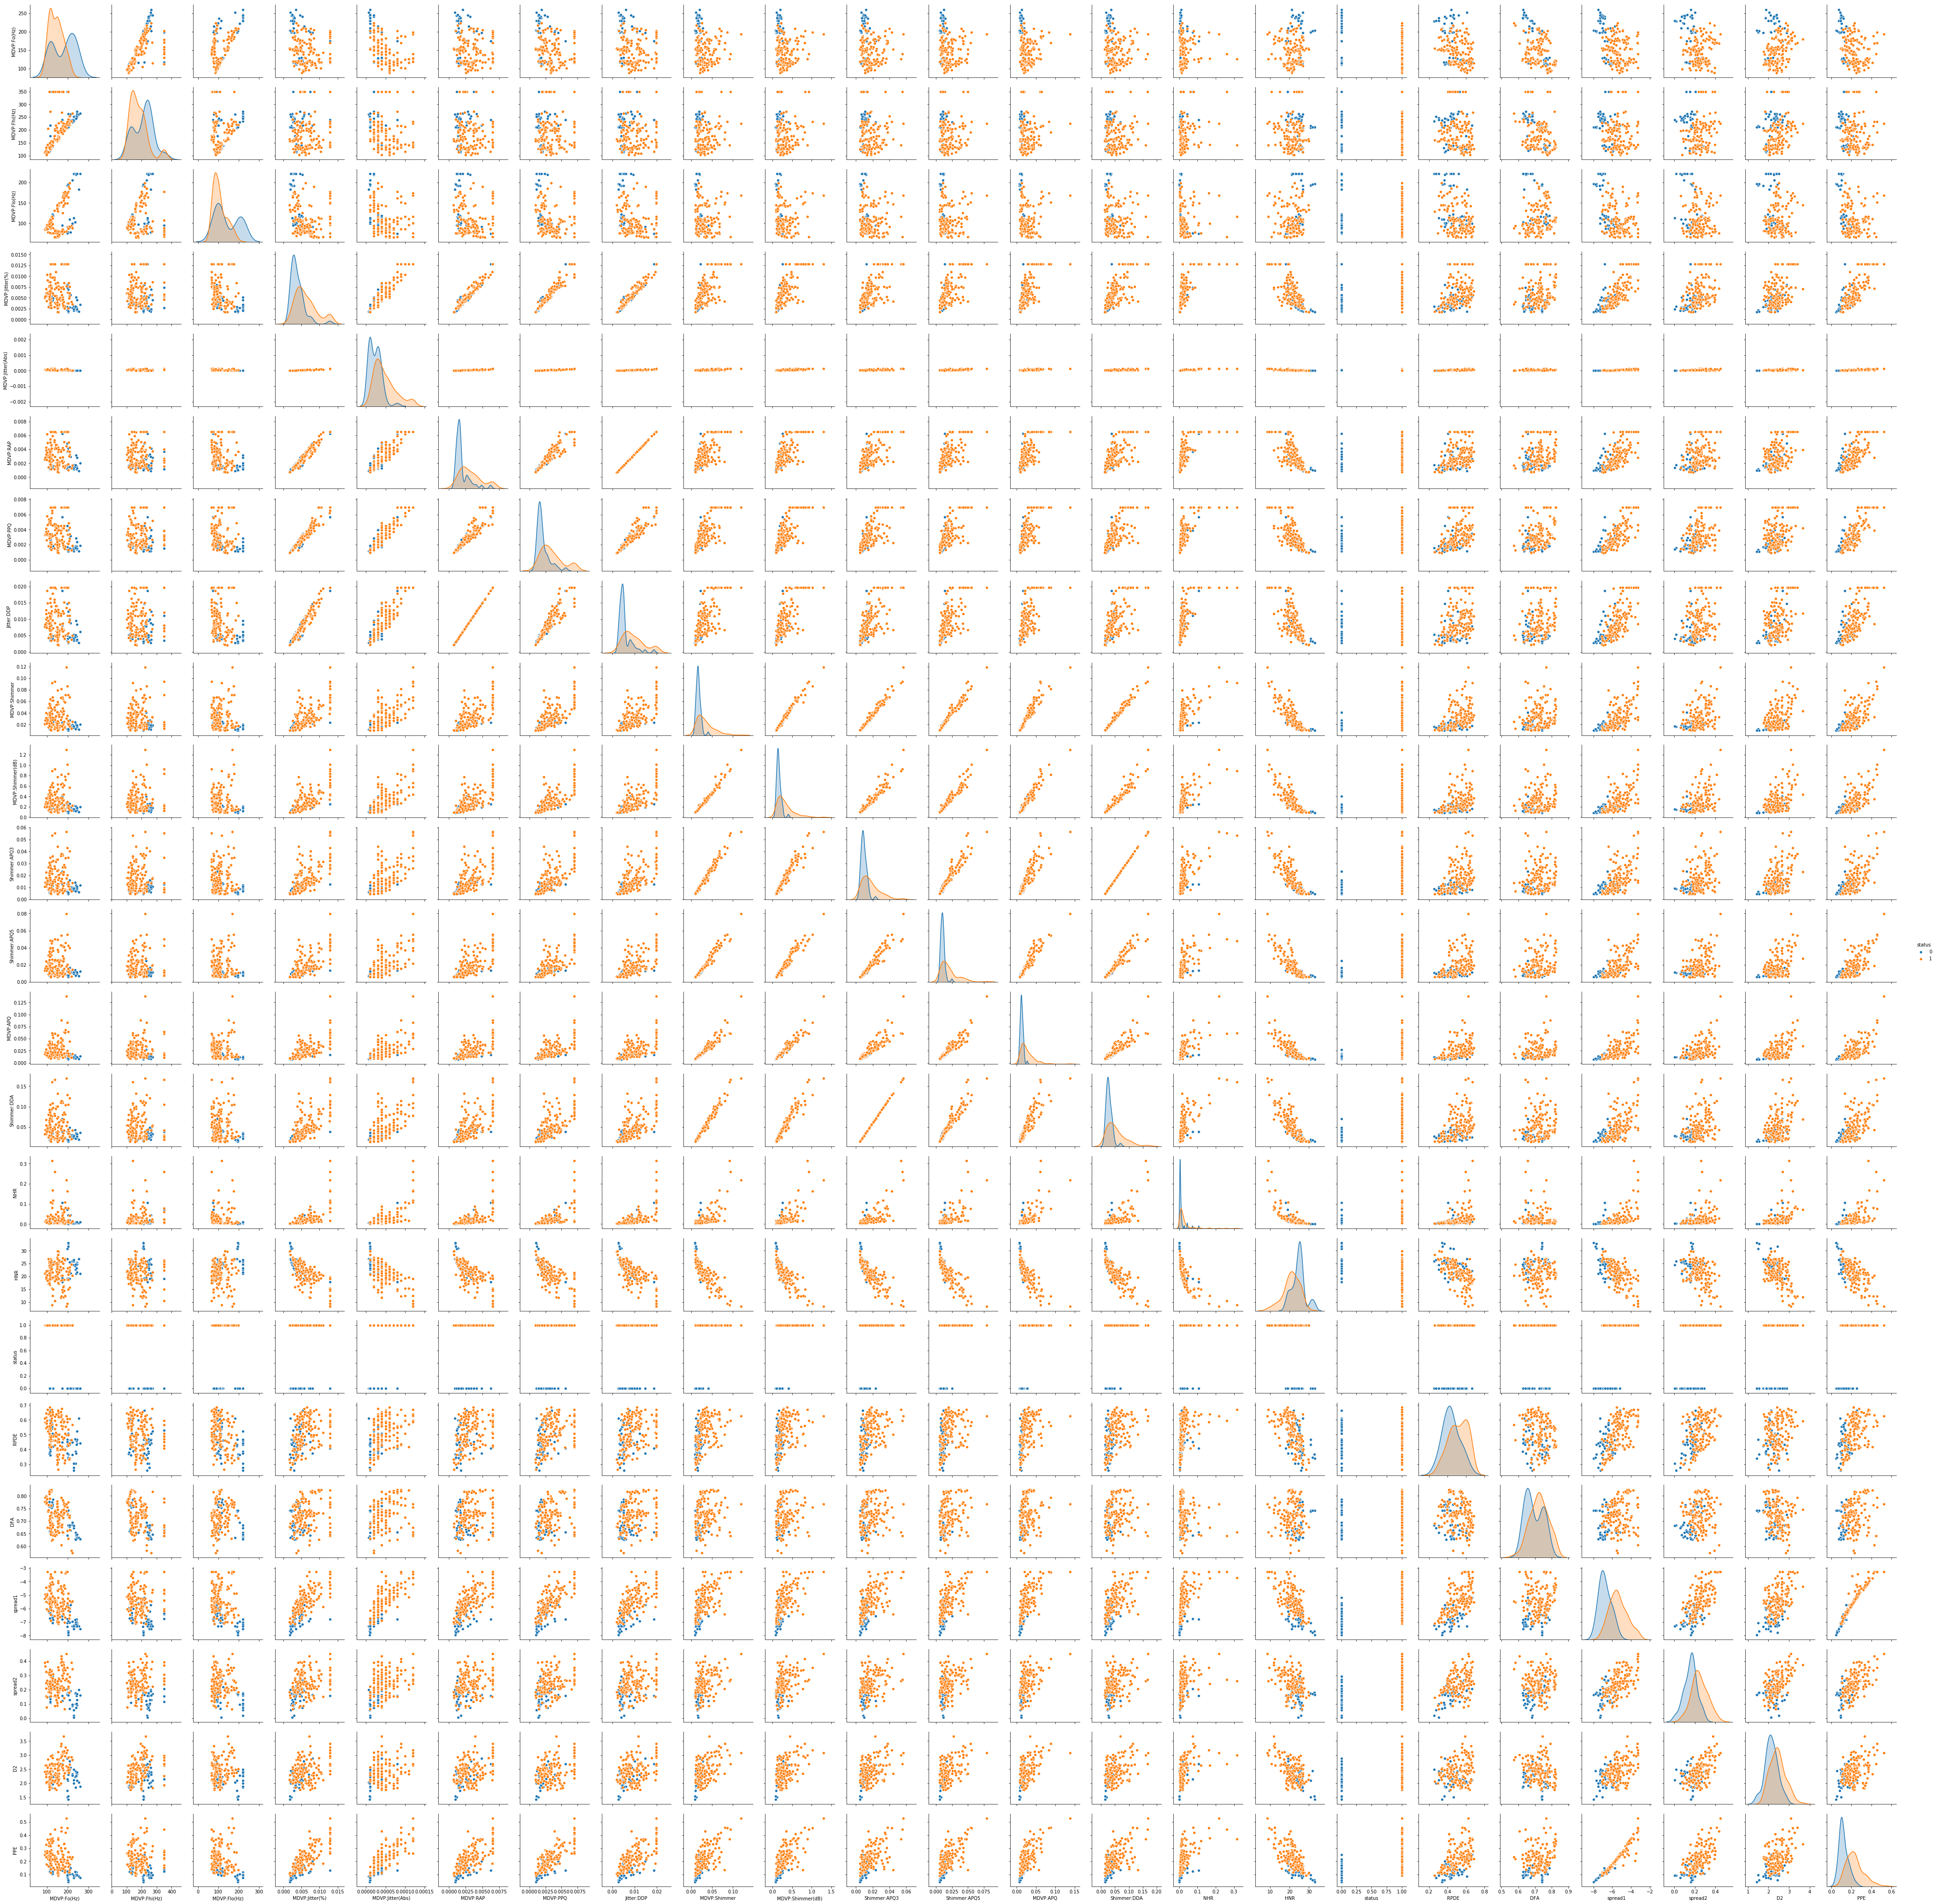

In [70]:
sns.pairplot(dfpd, hue = "status",diag_kind="kde")

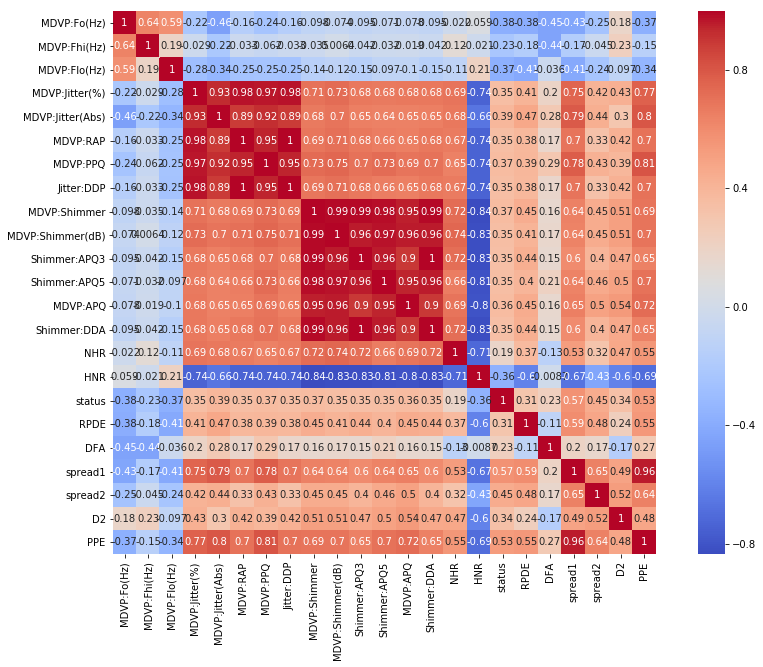

In [71]:
# Generating the correlation matrix and displaying correlation via heatmap
corr = dfpd.corr()
mask = np.zeros_like(corr)
plt.figure(figsize=(15,10))
sns.heatmap(corr, mask=mask,annot=True,square=True,cmap="coolwarm")

# Split the dataset into training and test set in the ratio of 70:30 (Training:Test)

In [184]:
# capture the target column ("status") into separate vectors for training set and test set

X = dfpd[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','NHR','HNR','RPDE','DFA','spread1','spread2','D2','PPE']]
y = dfpd["status"]

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.70,test_size=0.30)


print("X_train shape: {}".format(X_train.shape)),
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (136, 22)
X_test shape: (59, 22)
y_train shape: (136,)
y_test shape: (59,)


# Create the model using “entropy” method of reducing the entropy and fit it to training data

In [185]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy')
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

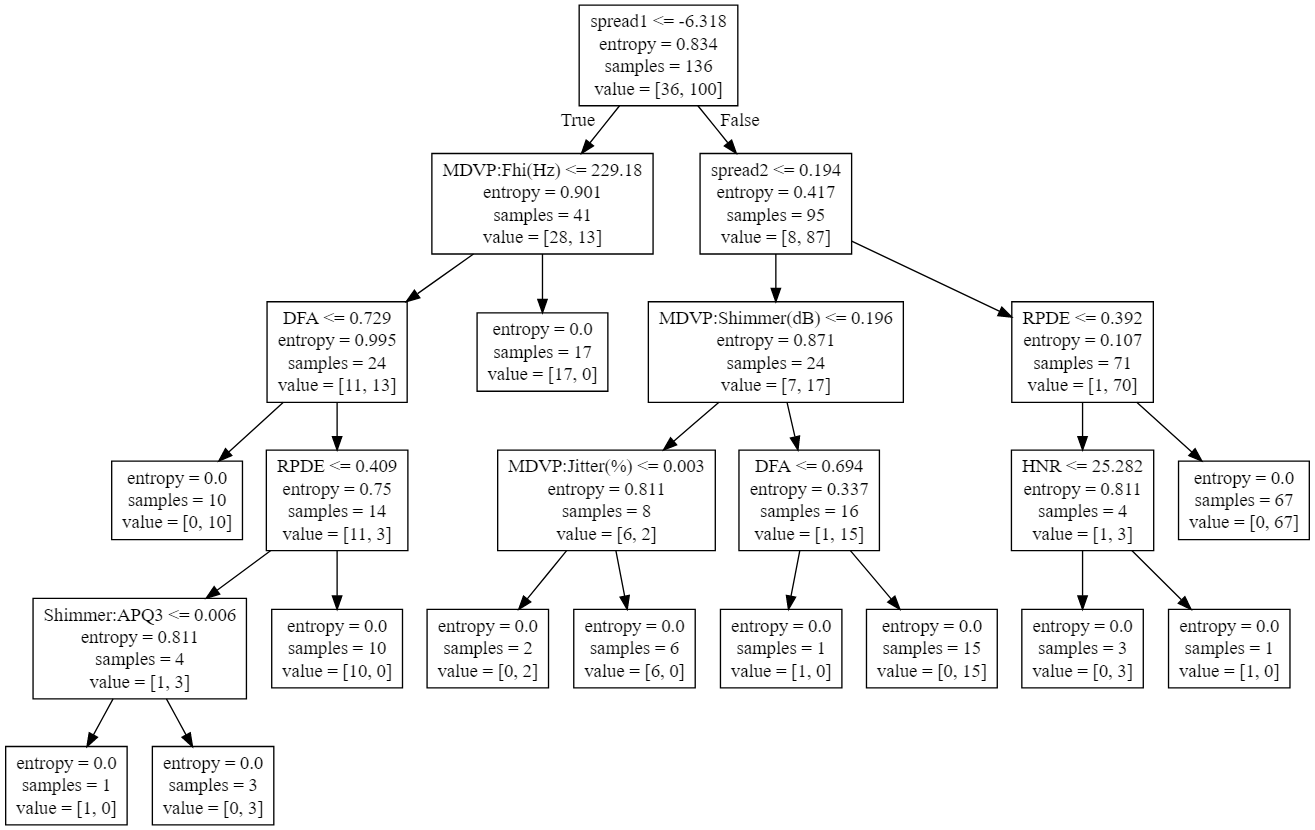

In [98]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

Parkinson_File = open('parkinson.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Parkinson_File, feature_names = list(X_train))

Parkinson_File.close()

system("dot -Tpng parkinson.dot -o parkinson.png")
Image("parkinson.png")

# Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab

In [192]:
y_pred=dt_model.predict(X_test)# performance on test data
acc=metrics.accuracy_score(y_test,y_pred)
print("Accuracy of the Decision tree model is" , acc)
print("Predicted values in crosstab \n", metrics.confusion_matrix(y_test, y_pred))

Accuracy of the Decision tree model is 0.864406779661017
Predicted values in crosstab 
 [[12  7]
 [ 1 39]]


# Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help ?

In [193]:
reg_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_leaf =10)
reg_dt_model.fit(X_train, y_train)
y_pred=reg_dt_model.predict(X_test)# performance on test data
acc=metrics.accuracy_score(y_test,y_pred)
print("Accuracy of the Decision tree model is" , acc)

Accuracy of the Decision tree model is 0.8983050847457628


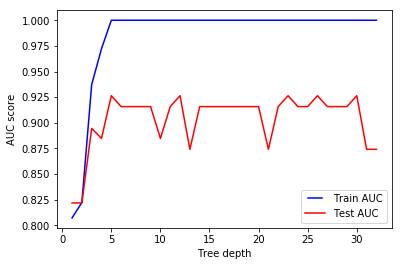

In [139]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

#### We see that our model overfits for large depth values. The tree perfectly predicts all of the train data, however, it fails to generalize the findings for new data

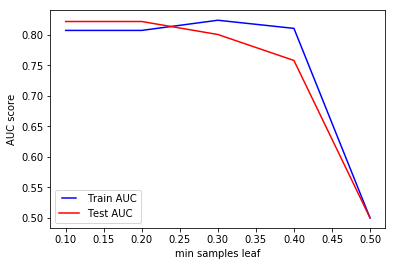

In [141]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()


#### Same conclusion as to previous parameter. Increasing this value may cause underfitting.

#### Regularization helps to solve over fitting or undef fitting problem in machine learning . Regularization also helps to choose preferred model complexity, so that model is better at predicting

# Implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result?

In [149]:
Rf_model = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=10 )
Rf_model.fit(X_train, y_train)
y_predict = Rf_model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7966101694915254


In [169]:
# cross_val_score takes care of splitting X and y into the 10 folds that's why we pass X and y entirely instead of X_train and y_train
scores = cross_val_score(Rf_model, X, y, cv=10, scoring='accuracy')
print(scores)
# Average accuracy as an estimate
print(scores.mean())

[0.75       0.95       0.9        0.95       1.         0.8
 0.65       0.78947368 0.83333333 0.83333333]
0.8456140350877194


In [171]:
# Choose some parameter combinations to try
parameters = {'n_estimators': [10, 50, 100], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }
# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(Rf_model, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the random forest model to the best combination of parameters
Rf_model = grid_obj.best_estimator_

print(grid_obj.best_score_)
print(grid_obj.best_params_)
# Actual model object fit with those best parameters
print(grid_obj.best_estimator_)

# Fit the best algorithm to the data. 
Rf_model.fit(X_train, y_train)

predictions = Rf_model.predict(X_test)
print("Accuracy:",accuracy_score(y_test, predictions))

0.8970588235294118
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False)
Accuracy: 0.9661016949152542
